## Imports

In [1]:
import matplotlib.pyplot as plt

In [2]:
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer


In [3]:
from tensorflow import keras
from tensorflow.keras import layers

In [4]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
train

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41996,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41997,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


---

## Reading Data

In [5]:
X = train.copy()
y = X.pop('label')

In [6]:
X_train, X_valid, y_train, y_valid = \
    train_test_split(X, y, stratify=y, train_size=0.2)

X_train = X_train / 255.0
X_valid = X_valid / 255.0

---

## Building Model

/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/keras/src/layers/normalization/batch_normalization.py:142: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/500
33/33 ━━━━━━━━━━━━━━━━━━━━ 7s 58ms/step - loss: 2.0353 - sparse_categorical_accuracy: 0.3773 - val_loss: 1.8162 - val_sparse_categorical_accuracy: 0.6415
Epoch 2/500
33/33 ━━━━━━━━━━━━━━━━━━━━ 7s 58ms/step - loss: 2.0353 - sparse_categorical_accuracy: 0.3773 - val_loss: 1.8162 - val_sparse_categorical_accuracy: 0.6415
Epoch 2/500
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.8477 - sparse_categorical_accuracy: 0.7275 - val_loss: 0.9070 - val_sparse_categorical_accuracy: 0.7854
Epoch 3/500
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.8477 - sparse_categorical_accuracy: 0.7275 - val_loss: 0.9070 - val_sparse_categorical_accuracy: 0.7854
Epoch 3/500
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.5546 - sparse_categorical_accuracy: 0.8245 - val_loss: 0.5048 - val_sparse_categorical_accuracy: 0.8563
Epoch 4/500
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.5546 - sparse_categorical_accuracy: 0.8245 - val_loss: 0.5048 - val_sparse_categorical_accuracy: 0.8563
Epoc

<Axes: title={'center': 'Accuracy'}>

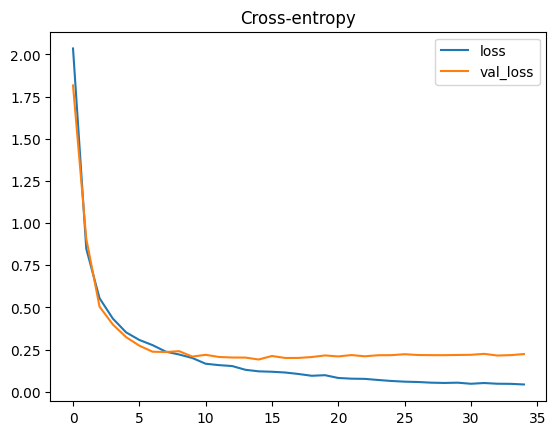

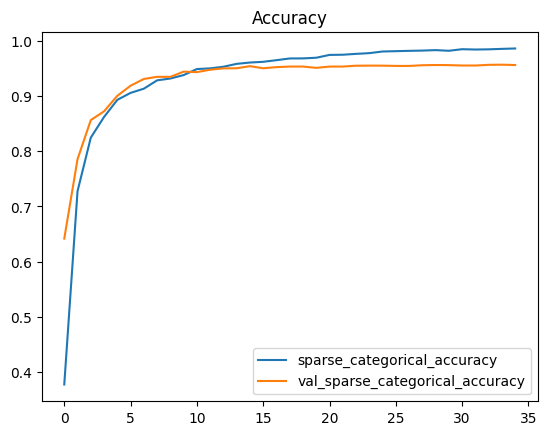

In [33]:
input_shape = [X_train.shape[1]]

model = keras.Sequential([
    layers.BatchNormalization(input_shape=input_shape),

    # build six hidden layer
    layers.Dense(256, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.3),
    layers.Dense(256, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.3),
     layers.Dense(256, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.3),
     layers.Dense(256, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.3),
     layers.Dense(256, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.3),
    layers.Dense(256, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.3),

    # 10 neurons for 10 digit to classify
    layers.Dense(10, activation='softmax'),
])

# Compile the model
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['sparse_categorical_accuracy'],
)

# Define early stopping
early_stopping = keras.callbacks.EarlyStopping(
    patience=20,
    min_delta=0.001,
    restore_best_weights=True,
)

# Train the model
history = model.fit(
    X_train, y_train,
    validation_data=(X_valid, y_valid),
    batch_size=256,
    epochs=500,
    callbacks=[early_stopping],
)

history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot(title="Cross-entropy")
history_df.loc[:, ['sparse_categorical_accuracy', 'val_sparse_categorical_accuracy']].plot(title="Accuracy")

#### The validation loss graph starts increasing after 10, not increasing and not decreasing, so the model isn't overfitting or underfitting

#### Adujusting early-stopping and dropout might not help here, so we should try adjusting hidden layers, epoch size, switching metrics and optimizer

In [ ]:
input_shape = [X_train.shape[1]]

model = keras.Sequential([
    layers.BatchNormalization(input_shape=input_shape),
    layers.Dense(1024, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.3),
    layers.Dense(1024, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.3),
    layers.Dense(1024, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.3),
    layers.Dense(10, activation='softmax'),
])

model.compile(
    optimizer='sgd',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy'],
)

early_stopping = keras.callbacks.EarlyStopping(
    patience=5,
    min_delta=0.001,
    restore_best_weights=True,
)
history = model.fit(
    X_train, y_train,
    validation_data=(X_valid, y_valid),
    batch_size=512,
    epochs=500,
    callbacks=[early_stopping],
)

history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot(title="Cross-entropy")
history_df.loc[:, ['accuracy', 'val_accuracy']].plot(title="Accuracy")

Epoch 1/500


/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/keras/src/layers/normalization/batch_normalization.py:142: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 5s 218ms/step - accuracy: 0.3755 - loss: 2.0754 - val_accuracy: 0.5604 - val_loss: 2.0919
Epoch 2/500
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step - accuracy: 0.6219 - loss: 1.2031 

#### I have tried adjusting hidden layers, epoch size, batch size, switching metrics and optimizer, and nothing helped to improve the model

---

## Output Submission

In [ ]:
predictions = model.predict(test).argmax(axis=1)
predictions_df = pd.DataFrame({
    'ImageId': range(1, len(predictions) + 1),
    'Label': predictions,
})
predictions_df


875/875 ━━━━━━━━━━━━━━━━━━━━ 10s 11ms/step


,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,9
4,5,3
...,...,...
27995,27996,9
27996,27997,7
27997,27998,3
27998,27999,9


In [ ]:
# submission_file_name = f'submission_{pd.Timestamp.now().strftime("%Y-%m-%d_%H-%M-%S")}.csv'
# predictions_df.to_csv(submission_file_name, index=False)